In [1]:
import numpy as np
import pandas as pd

In [2]:
!activate tensorflow

In [3]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!python --version

Python 3.5.3 :: Continuum Analytics, Inc.


In [5]:
!ls -la

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!ls -la ./data/train-jpg/*.jpg | wc -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
df_labels = pd.read_csv('./data/train-csv/train.csv')
df_labels.head(10)

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [8]:
labels = df_labels.tags.values
labels

array(['haze primary', 'agriculture clear primary water', 'clear primary',
       ..., 'agriculture clear primary', 'agriculture clear primary road',
       'agriculture cultivation partly_cloudy primary'], dtype=object)

In [9]:
labels_list = []
for lbl in labels:
    labels_list.extend(lbl.split(' '))
labels_set = set(labels_list)
labels_set

{'agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water'}

In [10]:
for i, label in enumerate(labels_set):
    print('label:%s  %d/%d' %(label, i+1, len(labels_set)))
    %time df_labels[label] = df_labels.tags.apply(lambda x : 1 if label in x.split(' ') else 0)


label:haze  1/17
Wall time: 33.1 ms
label:slash_burn  2/17
Wall time: 18.1 ms
label:cloudy  3/17
Wall time: 31.3 ms
label:road  4/17
Wall time: 34 ms
label:clear  5/17
Wall time: 15.6 ms
label:cultivation  6/17
Wall time: 29.6 ms
label:blow_down  7/17
Wall time: 22.8 ms
label:selective_logging  8/17
Wall time: 37.3 ms
label:agriculture  9/17
Wall time: 28.1 ms
label:primary  10/17
Wall time: 15.7 ms
label:habitation  11/17
Wall time: 31.3 ms
label:partly_cloudy  12/17
Wall time: 31.3 ms
label:conventional_mine  13/17
Wall time: 31.2 ms
label:bare_ground  14/17
Wall time: 31.3 ms
label:artisinal_mine  15/17
Wall time: 32.7 ms
label:blooming  16/17
Wall time: 25.2 ms
label:water  17/17
Wall time: 31.3 ms


In [11]:
df_labels

,image_name,tags,haze,slash_burn,cloudy,road,clear,cultivation,blow_down,selective_logging,agriculture,primary,habitation,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,water
0,train_0,haze primary,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
2,train_2,clear primary,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,train_3,clear primary,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0
5,train_5,haze primary water,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6,train_6,agriculture clear cultivation primary water,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1
7,train_7,haze primary,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,train_8,agriculture clear cultivation primary,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0
9,train_9,agriculture clear cultivation primary road,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0


In [12]:
df_train = df_labels.tags.str.get_dummies(' ')
df_train.insert(0, 'image_name', df_labels.image_name)
df_train.head(10)

,image_name,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,train_2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,train_3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,train_4,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
5,train_5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
6,train_6,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
7,train_7,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8,train_8,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
9,train_9,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0


In [13]:
%matplotlib inline

In [14]:
df_train[list(labels_set)].sum().sort_values()

blow_down               98
conventional_mine      100
slash_burn             209
blooming               332
artisinal_mine         339
selective_logging      340
bare_ground            862
cloudy                2089
haze                  2697
habitation            3660
cultivation           4477
partly_cloudy         7261
water                 7411
road                  8071
agriculture          12315
clear                28431
primary              37513
dtype: int64

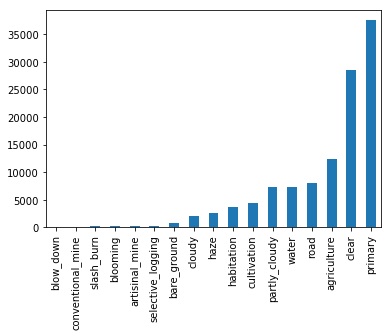

In [15]:
df_train[list(labels_set)].sum().sort_values().plot(kind='bar')

In [16]:
ordered_labels = df_train[list(labels_set)].sum().sort_values(ascending=False).index
type(ordered_labels)

pandas.core.indexes.base.Index

In [17]:
df_train[ordered_labels].corr()

,primary,clear,agriculture,road,water,partly_cloudy,cultivation,habitation,haze,cloudy,bare_ground,selective_logging,artisinal_mine,blooming,slash_burn,conventional_mine,blow_down
primary,1.000000,0.273743,0.115259,0.058937,0.032609,0.110213,0.092507,0.025513,0.064862,-0.829594,-0.076070,0.025879,0.010236,0.025570,0.020257,0.002535,0.013852
clear,0.273743,1.000000,0.058765,0.084686,0.041464,-0.718208,0.065897,0.097849,-0.410428,-0.358343,0.052982,0.040967,0.040851,0.046617,0.019757,-0.000257,0.017776
agriculture,0.115259,0.058765,1.000000,0.480930,0.063498,0.039743,0.344964,0.303979,-0.031978,-0.154252,-0.013854,-0.022616,-0.038379,-0.041082,0.041518,-0.006948,-0.008538
road,0.058937,0.084686,0.480930,1.000000,0.103498,-0.010596,0.079122,0.443341,-0.035642,-0.116412,0.064728,0.056375,0.028774,-0.038526,-0.004893,0.048653,-0.022068
water,0.032609,0.041464,0.063498,0.103498,1.000000,-0.005721,0.009845,0.054555,0.030541,-0.110432,0.021320,-0.009273,0.166084,-0.031718,-0.012714,0.009898,-0.019422
partly_cloudy,0.110213,-0.718208,0.039743,-0.010596,-0.005721,1.000000,-0.011306,-0.048390,-0.124914,-0.109062,-0.035959,-0.023980,-0.023888,-0.030380,-0.004034,0.013052,-0.005999
cultivation,0.092507,0.065897,0.344964,0.079122,0.009845,-0.011306,1.000000,0.134639,-0.030414,-0.082260,-0.003458,0.017603,-0.016849,-0.001502,0.113073,-0.011202,-0.004550
habitation,0.025513,0.097849,0.303979,0.443341,0.054555,-0.048390,0.134639,1.000000,-0.039675,-0.073547,0.050756,-0.016747,-0.001561,-0.024851,0.026567,0.046781,-0.010273
haze,0.064862,-0.410428,-0.031978,-0.035642,0.030541,-0.124914,-0.030414,-0.039675,1.000000,-0.062324,-0.011276,-0.019162,-0.019118,-0.019903,-0.015101,-0.009305,-0.013162
cloudy,-0.829594,-0.358343,-0.154252,-0.116412,-0.110432,-0.109062,-0.082260,-0.073547,-0.062324,1.000000,-0.034409,-0.021469,-0.021437,-0.021213,-0.016805,-0.011609,-0.011492


In [18]:
import seaborn as sns

In [19]:
df_occurence = df_train[ordered_labels].T.dot(df_train[ordered_labels])
df_occurence

,primary,clear,agriculture,road,water,partly_cloudy,cultivation,habitation,haze,cloudy,bare_ground,selective_logging,artisinal_mine,blooming,slash_burn,conventional_mine,blow_down
primary,37513,27668,11972,7728,7001,7175,4455,3469,2670,0,683,340,324,332,209,94,98
clear,27668,28431,9150,6295,5502,0,3527,3090,0,0,747,308,307,311,173,70,85
agriculture,11972,9150,12315,6034,2712,2493,3377,2737,672,0,225,65,38,32,119,24,22
road,7728,6295,6034,8071,2125,1382,1294,2786,394,0,323,151,110,10,36,59,2
water,7001,5502,2712,2125,7411,1295,868,915,613,0,206,49,299,16,24,26,3
partly_cloudy,7175,0,2493,1382,1295,7261,748,441,0,0,74,27,27,17,33,28,13
cultivation,4455,3527,3377,1294,868,748,4477,895,202,0,89,58,18,35,126,4,8
habitation,3469,3090,2737,2786,915,441,895,3660,129,0,163,13,29,4,41,36,3
haze,2670,0,672,394,613,0,202,129,2697,0,41,5,5,4,3,2,0
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


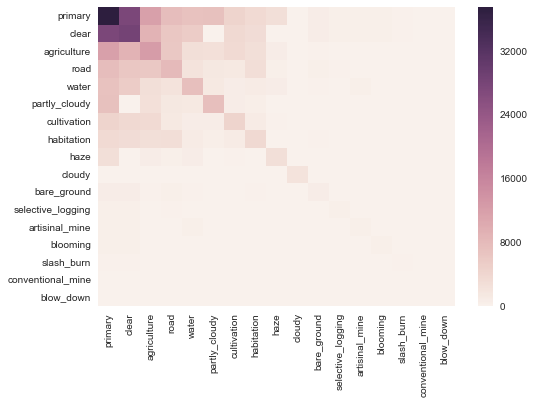

In [20]:
sns.heatmap(df_occurence)

In [21]:
df_percentage = df_train[ordered_labels].sum() / df_train[ordered_labels].count() * 100
df_percentage

primary              92.672744
clear                70.236419
agriculture          30.423182
road                 19.938734
water                18.308259
partly_cloudy        17.937696
cultivation          11.060056
habitation            9.041725
haze                  6.662714
cloudy                5.160701
bare_ground           2.129499
selective_logging     0.839942
artisinal_mine        0.837471
blooming              0.820178
slash_burn            0.516317
conventional_mine     0.247042
blow_down             0.242101
dtype: float64

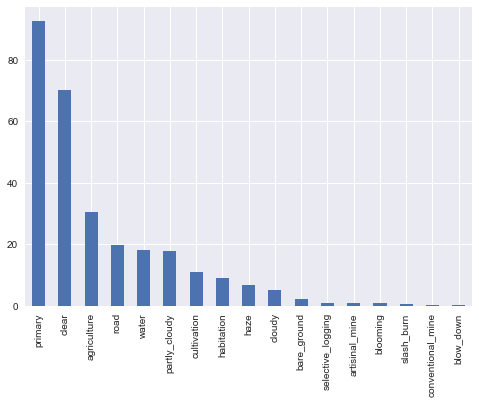

In [22]:
df_percentage.plot(kind='bar')

In [23]:
TRAIN_PATH = './data/train-jpg/'

In [24]:
import os

In [25]:
from PIL import Image
import random
import matplotlib.pyplot as plt

In [26]:
def plot_graph(label):

    images = df_train[df_train[label] == 1].image_name.values

    fig , ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
    ax = ax.flatten()

    for i in range(0,9):
        f = random.choice(images)
        img = Image.open(os.path.join(TRAIN_PATH, f + '.jpg'))
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title("%s h:%s w:%s" % (f, img.height,img.width))
    plt.tight_layout()

Wall time: 659 ms


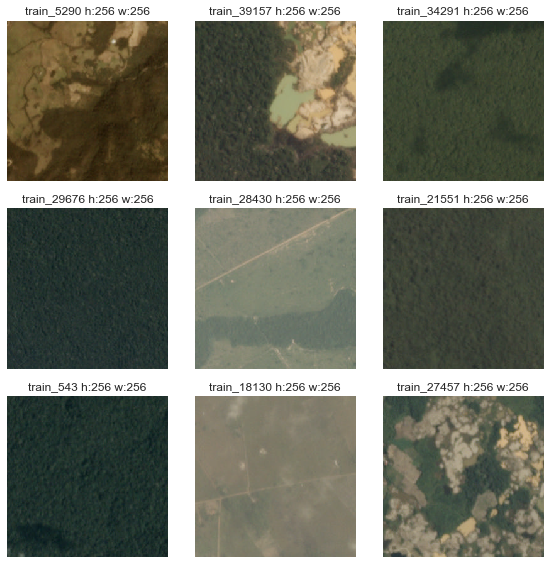

In [27]:
%time plot_graph('primary')

Wall time: 709 ms


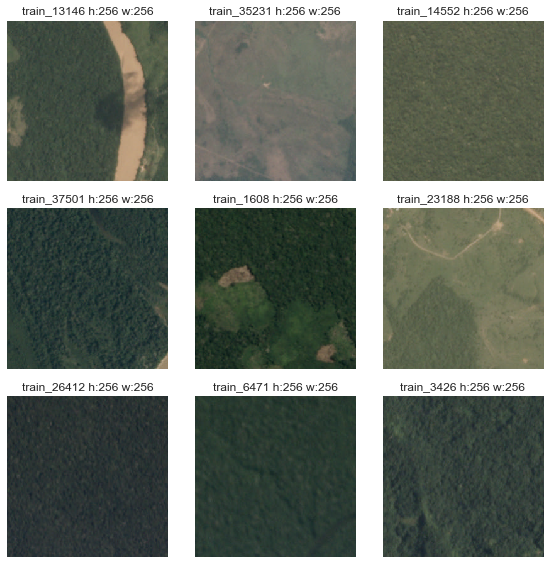

In [28]:
%time plot_graph('clear')

Wall time: 745 ms


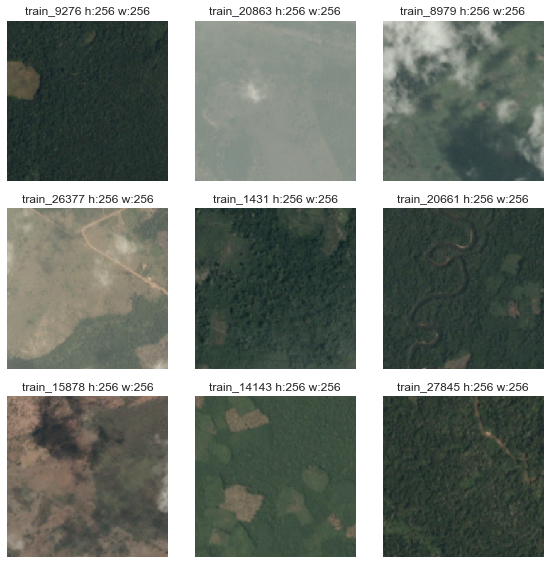

In [29]:
%time plot_graph('agriculture')

Wall time: 788 ms


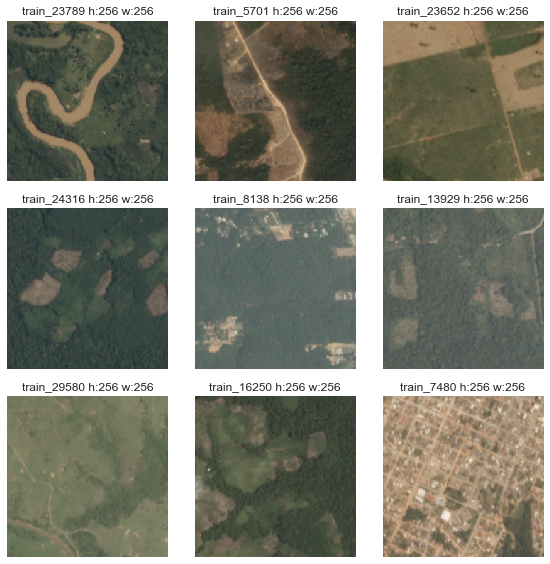

In [30]:
%time plot_graph('habitation')

In [31]:
%time df_train['image_name_w_ext'] = df_train.image_name.values + '.jpg'

Wall time: 0 ns


In [32]:
if not 'image_name_w_ext' in df_train.columns:
    %time df_train = df_train[['image_name', 'image_name_w_ext'] + list(df_train.columns.values[1:-1])]
df_train.head(10)

,image_name,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water,image_name_w_ext
0,train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,train_0.jpg
1,train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,train_1.jpg
2,train_2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,train_2.jpg
3,train_3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,train_3.jpg
4,train_4,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,train_4.jpg
5,train_5,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,train_5.jpg
6,train_6,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,train_6.jpg
7,train_7,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,train_7.jpg
8,train_8,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,train_8.jpg
9,train_9,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,train_9.jpg


In [33]:
for f in df_train.image_name_w_ext:
    if os.path.exists(os.path.join(TRAIN_PATH, f)) == False:
        print("%s is missing" % image_name)

In [34]:
%time shapes = [Image.open(os.path.join(TRAIN_PATH, f)).size for f in df_train.image_name_w_ext[:1000]]

Wall time: 15.7 s


In [35]:
%time pd.Series(shapes).value_counts()

Wall time: 2.01 ms


(256, 256)    1000
dtype: int64

In [36]:
N_COLS = 32
N_ROWS = 32
N_CHANNELS = 3
MINI_BATCH_SIZE = 393
SHUFFLE = False
BATCH_SIZE = len(df_train)
NB_CATEGORIES = len(ordered_labels)
NB_EPOCHS = 1

In [37]:
y_enc = df_train[ordered_labels].values
y_enc

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [38]:
%time idx = np.random.permutation(len(df_train)) if SHUFFLE == True else np.linspace(start = 0,stop = BATCH_SIZE - 1, num = BATCH_SIZE, dtype=int)
idx

Wall time: 0 ns


array([    0,     1,     2, ..., 40476, 40477, 40478])

In [39]:
%time batches = np.array_split(idx, MINI_BATCH_SIZE)

Wall time: 0 ns


## Build Graph

In [40]:
import tensorflow as tf
print(tf.__version__)

1.1.0


In [41]:
tf.reset_default_graph()

In [42]:
config = tf.ConfigProto()

In [43]:
config.log_device_placement = True

In [44]:
sess = tf.InteractiveSession(config=config)

In [45]:
X = tf.placeholder(dtype=tf.float32,shape=(None, 32,32,3), name="X")
y = tf.placeholder(dtype=tf.float32,shape=(None,17), name="y")

In [46]:
W_conv1 = tf.get_variable(name="W_conv1", shape=[5,5,3,32], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_conv1 = tf.get_variable(name="b_conv1", shape=[32], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

W_conv2 = tf.get_variable(name="W_conv2", shape=[5,5,32,64], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_conv2 = tf.get_variable(name="b_conv2", shape=[64], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

W_fc1 = tf.get_variable(name="W_fc1", shape=[8*8*64,1024], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_fc1 = tf.get_variable(name="b_fc1", shape=[1024], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

W_fc2 = tf.get_variable(name="W_fc2", shape=[1024, 17], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_fc2 = tf.get_variable(name="b_fc2", shape=[17], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

In [47]:
conv1 = tf.nn.conv2d(
    input=X,
    filter=W_conv1,
    strides=[1,1,1,1],
    padding='SAME',
    name='conv1'
) #256 * 256 * 64

relu1 = tf.nn.relu(
    features = conv1 + b_conv1,
    name='relu1'
) #256 * 256 * 64

pool1 = tf.nn.max_pool(
    value = relu1,
    ksize=[1,2,2,1],
    strides=[1,2,2,1],
    padding='SAME',
    name='pool1'
) #128 * 128 * 64

In [48]:
conv2 = tf.nn.conv2d(
    input=pool1,
    filter=W_conv2,
    strides=[1,1,1,1],
    padding='SAME',
    name='conv2'
) #128 * 128 *128

relu2 = tf.nn.relu(
    features = conv2 + b_conv2,
    name='relu2'
) #128 * 128 *128

pool2 = tf.nn.max_pool(
    value = relu2,
    ksize=[1,2,2,1],
    strides=[1,2,2,1],
    padding='SAME',
    name='pool2'
) #64 * 64 *128

In [49]:
pool_2_flat = tf.reshape(
    tensor=pool2,
    shape=(-1,8*8*64),
    name='pool_2-flat'
)

In [50]:
fc1 = tf.nn.relu(tf.matmul(pool_2_flat,W_fc1) + b_fc1)

In [51]:
#from tensorflow.contrib import learn

In [52]:
keep_prob = tf.placeholder(dtype=tf.float32, name="keep_prob")

In [53]:
dropout = tf.nn.dropout(
    x=fc1,
    keep_prob=keep_prob
)

In [54]:
fc2 = tf.matmul(dropout, W_fc2) + b_fc2 #1024 * 17

In [55]:
probabilities = tf.nn.sigmoid(fc2)

## Feed data

In [56]:
cross_entropy =  tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits= fc2)

In [57]:
train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cross_entropy)

In [58]:
tf.add_to_collection(name='train_step', value=train_step)

In [59]:
import cv2

In [60]:
import datetime as dt
import os

In [61]:
saver = tf.train.Saver()

In [62]:
%time sess.run(tf.global_variables_initializer())

Wall time: 1.26 s


In [168]:
training_start_time = dt.datetime.now()
print('Starting training....')

for n in range(NB_EPOCHS):
    
    epoch_start_time = dt.datetime.now()
    total_accuracy = 0
    
    for step,batch in enumerate(batches):
        batch_start_time = dt.datetime.now()
        
        images_names = df_train.loc[batch,:].image_name_w_ext
        images_names = images_names.apply(lambda x : os.path.join(TRAIN_PATH, x))        
        
        images_list = [cv2.imread(im, cv2.IMREAD_COLOR) for im in images_names]
        images_list = [cv2.resize(im, (32,32), interpolation = cv2.INTER_CUBIC) for im in images_list]
        images_array = np.asarray(images_list)
        
        images_array = images_array / 255
        
        model_name = 'mymodel_' + dt.datetime.now().strftime('%Y%m%d')
        
        train_step.run(feed_dict={
                X: images_array, 
                y: y_enc[batch,:],
                keep_prob: 0.5})
        
        predictions = tf.round(probabilities)
          
        predictions_array = predictions.eval(feed_dict={
            X: images_array,            
            keep_prob: 1})
        
        batch_accuracy = 100 * np.mean(np.amin(np.equal(predictions_array, y_enc[batch,:]), axis = 1))        
        total_accuracy += batch_accuracy * images_array.shape[0] / df_train.shape[0]
        
        if step%25 == 0:
            print ("epoch: %d step: %d total_acuracy: %g batch_accuracy: %g duration: %s nbImages: %d" % (n,step,total_accuracy,batch_accuracy,str(dt.datetime.now()-batch_start_time),images_names.size))
            saver.save(sess, os.path.join('./ckpt', model_name), global_step=step)         
    
    saver.save(sess, os.path.join('./ckpt', 'mymodel_' + dt.datetime.now().strftime('%Y%m%d') + '_final.ckpt'))     
    print("epoch: %d total_accuracy: %g accuracy: %g duration: %s" % (n, total_accuracy,batch_accuracy, str(dt.datetime.now()-epoch_start_time)))

print('End of training: %s' % str(dt.datetime.now() - training_start_time))

Starting training....
epoch: 0 step: 0 total_acuracy: 0.128462 batch_accuracy: 44.4444 duration: 0:00:00.575074 nbImages: 117
epoch: 0 step: 25 total_acuracy: 3.28565 batch_accuracy: 47.0085 duration: 0:00:00.629435 nbImages: 117
epoch: 0 step: 50 total_acuracy: 6.65283 batch_accuracy: 42.735 duration: 0:00:00.586691 nbImages: 117
epoch: 0 step: 75 total_acuracy: 9.98048 batch_accuracy: 44.4444 duration: 0:00:00.562561 nbImages: 117
epoch: 0 step: 100 total_acuracy: 13.1525 batch_accuracy: 49.5726 duration: 0:00:00.562591 nbImages: 117
epoch: 0 step: 125 total_acuracy: 16.3295 batch_accuracy: 42.735 duration: 0:00:00.562561 nbImages: 117
epoch: 0 step: 150 total_acuracy: 19.7485 batch_accuracy: 43.5897 duration: 0:00:00.593814 nbImages: 117
epoch: 0 step: 175 total_acuracy: 23.1429 batch_accuracy: 42.735 duration: 0:00:00.595475 nbImages: 117
epoch: 0 step: 200 total_acuracy: 26.3322 batch_accuracy: 43.5897 duration: 0:00:00.552952 nbImages: 117
epoch: 0 step: 225 total_acuracy: 29.635

TypeError: join() argument must be str or bytes, not 'float'

In [171]:
batch.shape

(117,)

In [164]:
%time sess.run(tf.global_variables_initializer())

Wall time: 361 ms


In [165]:
NB_EPOCHS = 10

In [166]:
training_start_time = dt.datetime.now()
print('Starting training....')

model_name = 'mymodel_' + dt.datetime.now().strftime('%Y%m%d') + '_final.ckpt'
%time saver = tf.train.import_meta_graph(meta_graph_or_file = os.path.join('./ckpt', model_name + '.meta'))
%time saver.restore(sess, os.path.join('./ckpt', model_name))

for n in range(NB_EPOCHS):
    
    epoch_start_time = dt.datetime.now()
    total_accuracy = 0
    
    for step,batch in enumerate(batches):
        batch_start_time = dt.datetime.now()
        
        images_names = df_train.loc[batch,:].image_name_w_ext
        images_names = images_names.apply(lambda x : os.path.join(TRAIN_PATH, x))
        
        images_list = [cv2.imread(im, cv2.IMREAD_COLOR) for im in images_names]
        images_list = [cv2.resize(im, (32,32), interpolation = cv2.INTER_CUBIC) for im in images_list]
        images_array = np.asarray(images_list)
        
        images_array = images_array / 255
        
        train_step = tf.get_collection('train_step')[0]
        
        train_step.run(feed_dict={
                X: images_array, 
                y: y_enc[batch,:],
                keep_prob: 0.5})
        
        predictions = tf.round(probabilities)
          
        predictions_array = predictions.eval(feed_dict={
            X: images_array,             
            keep_prob: 1})
        
        batch_accuracy = 100 * np.mean(np.amin(np.equal(predictions_array, y_enc[batch,:]), axis = 1))
        total_accuracy += batch_accuracy * images_array.shape[0] / df_train.shape[0]
        
        if step%25 == 0:
            print ("epoch: %d step: %d total_acuracy: %g batch_accuracy: %g duration: %s nbImages: %d" % (n,step,total_accuracy,batch_accuracy,str(dt.datetime.now()-batch_start_time),images_names.size))
            
    print("epoch: %d total_accuracy: %g accuracy: %g duration: %s" % (n, total_accuracy,batch_accuracy, str(dt.datetime.now()-epoch_start_time)))

print('End of training: %s' % str(dt.datetime.now() - training_start_time))

Starting training....


OSError: File ./ckpt\mymodel_20170607_final.ckpt.meta does not exist.

INFO:tensorflow:Restoring parameters from ./ckpt\mymodel_20170607_final.ckpt


NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./ckpt\mymodel_20170607_final.ckpt
	 [[Node: save/RestoreV2_3 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_3/tensor_names, save/RestoreV2_3/shape_and_slices)]]
	 [[Node: save/RestoreV2_3/_2487 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_222_save/RestoreV2_3", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'save/RestoreV2_3', defined at:
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-61-18da33d742f9>", line 1, in <module>
    saver = tf.train.Saver()
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 1056, in __init__
    self.build()
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 1086, in build
    restore_sequentially=self._restore_sequentially)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 691, in build
    restore_sequentially, reshape)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\training\saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 669, in restore_v2
    dtypes=dtypes, name=name)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\GRANVILLE-MSI\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./ckpt\mymodel_20170607_final.ckpt
	 [[Node: save/RestoreV2_3 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_3/tensor_names, save/RestoreV2_3/shape_and_slices)]]
	 [[Node: save/RestoreV2_3/_2487 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_222_save/RestoreV2_3", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


epoch: 0 step: 0 total_acuracy: 0.0914054 batch_accuracy: 31.6239 duration: 0:00:04.595278 nbImages: 117
epoch: 0 step: 25 total_acuracy: 2.49265 batch_accuracy: 37.6068 duration: 0:00:03.314791 nbImages: 117
epoch: 0 step: 50 total_acuracy: 5.08659 batch_accuracy: 32.4786 duration: 0:00:02.437792 nbImages: 117
epoch: 0 step: 75 total_acuracy: 7.78675 batch_accuracy: 38.4615 duration: 0:00:02.480391 nbImages: 117
epoch: 0 step: 100 total_acuracy: 10.4425 batch_accuracy: 42.735 duration: 0:00:02.265881 nbImages: 117
epoch: 0 step: 125 total_acuracy: 13.1056 batch_accuracy: 35.0427 duration: 0:00:02.235600 nbImages: 117
epoch: 0 step: 150 total_acuracy: 16.0775 batch_accuracy: 35.8974 duration: 0:00:02.267887 nbImages: 117
epoch: 0 step: 175 total_acuracy: 19.0346 batch_accuracy: 39.3162 duration: 0:00:01.912019 nbImages: 117
epoch: 0 step: 200 total_acuracy: 21.9274 batch_accuracy: 41.8803 duration: 0:00:02.354925 nbImages: 117
epoch: 0 step: 225 total_acuracy: 24.971 batch_accuracy: 46

TypeError: join() argument must be str or bytes, not 'float'

In [ ]:
df_submit = pd.read_csv('./data/submission/sample_submission_v2.csv')
df_submit.head(10)

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
TEST_PATH = './data/test-jpg/'

In [ ]:
df_submit['image_name'] = df_submit['image_name'] + '.jpg'
df_submit.head(10)

In [ ]:
training_start_time = dt.datetime.now()
print('Starting prediction....')

model_name = 'mymodel_' + dt.datetime.now().strftime('%Y%m%d') + '_final.ckpt'
%time saver = tf.train.import_meta_graph(meta_graph_or_file = os.path.join('./ckpt', model_name + '.meta'))
%time saver.restore(sess, os.path.join('./ckpt', model_name))

predictions_list = []
batches = np.array_split(np.arange(df_submit.shape[0]), 523)

for step, batch in enumerate(batches):
   
    images_names = df_submit.loc[batch, :].image_name
    images_names = images_names.apply(lambda x : os.path.join(TEST_PATH, x))
    
    images_list = [cv2.imread(im, cv2.IMREAD_COLOR) for im in images_names]
    images_list = [cv2.resize(im, (32,32), interpolation = cv2.INTER_CUBIC) for im in images_list]
    images_array = np.asarray(images_list)

    images_array = images_array / 255

    predictions = tf.round(probabilities)

    predictions_list.append(predictions.eval(feed_dict={
        X: images_array, 
        keep_prob: 1}))
        
predictions_array = np.array(predictions_list)

print('End of prediction: %s' % str(dt.datetime.now() - training_start_time))

In [ ]:
ordered_labels = np.array(ordered_labels)

In [ ]:
predictions_array = np.vstack(predictions_array)

In [ ]:
z = np.array([' '.join(ordered_labels[np.nonzero(row)]) for row in predictions_array])
z

In [ ]:
df_submit = pd.read_csv('./data/submission/sample_submission_v2.csv')
df_submit['tags'] = z

In [ ]:
df_submit.to_csv('submission.csv',index=False)